In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_regression
import pandas as pd

In [13]:
# read in csv to be used for model
data = pd.read_csv('data/new_country_data.csv')
data = data.dropna()

In [14]:
# Assign the data to x and y 
X = data[['happiness_score_2015','human_development_index','gdp_percapita_2015','alcohol_consumption_percapita',\
         'health_spending_percapita_2015','private_debt_2015']]
y = data['sui_per_100k_2015'].values.reshape(-1,1)
print(X.shape,y.shape)

(110, 6) (110, 1)


In [15]:
# create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [16]:
# create the model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [17]:
# fit the model to the training data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.363472130138092
Testing Score: 0.48264635948135426


Text(0.5, 1.0, 'Residual Plot')

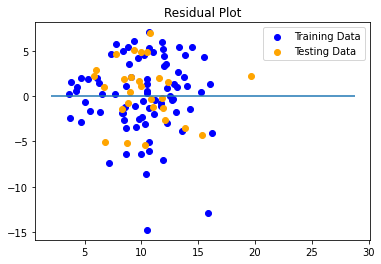

In [18]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")